✅ Model, hyperparameters, and scaler loaded successfully.


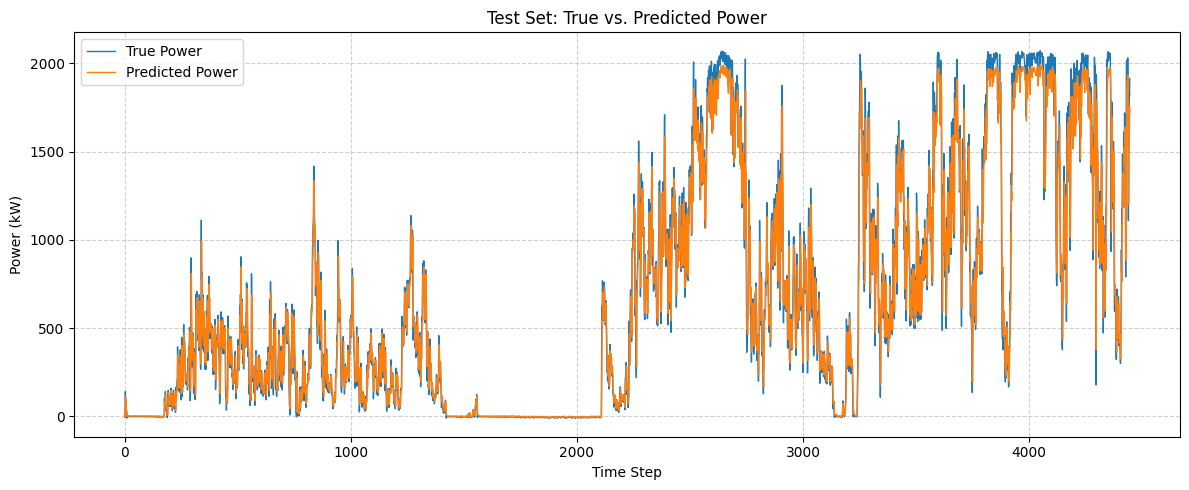

In [4]:
# -------------------------------
# Imports
# -------------------------------
from functions import LSTMPredictor, plot_predictions
from imports import *
from config import *


# -------------------------------
# Load Saved Model  + DATA
# -------------------------------

MODEL_DICT = os.path.join(SAVE_DIR, MODEL_FILE)

with open(MODEL_DICT, 'rb') as f:
    model_state_dict = pickle.load(f)

with open(f'{DATA_DIR}/clean_prepped_dataset.pkl', 'rb') as f:
    clean_prepped_dataset = pickle.load(f)

scaler = clean_prepped_dataset['scaler']
dataset = clean_prepped_dataset['dataset']

# -------------------------------
# Rebuild Model
# -------------------------------

model = LSTMPredictor(N_CHANNELS, HIDDEN_SIZE, NUM_LAYERS)
model.load_state_dict(model_state_dict)
model.eval()

print("✅ Model loaded successfully.")

# -------------------------------
# Plot Desired Split
# -------------------------------

SPLIT_TO_PLOT = "test"  # Choose: "train", "valid", "test"

split_map = {
    "train": dataset["train"],
    "valid": dataset["valid"],
    "test": dataset["test"]
}

if SPLIT_TO_PLOT in split_map:
    X_split, y_split = split_map[SPLIT_TO_PLOT]
    plot_predictions(model, X_split, y_split, scaler, split_name=SPLIT_TO_PLOT)
else:
    print("❌ Invalid SPLIT_TO_PLOT. Choose from 'train', 'valid', or 'test'.")
